<a href="https://colab.research.google.com/github/B-V-SAI-PRANAV/MACHINE-LEARNING-/blob/main/Predictive_analysis_in_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Understanding the data**

importing libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataframe=pd.read_csv("/content/diabetes.csv")
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataframe.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
dataframe.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [ ]:
dataframe.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
dataframe.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


if we observe we can find some zeroes in bp and other columns which are not possible in general .so we should modify them

In [ ]:
dataframe.shape

(768, 9)

Target-(0,1)->BInary classification
As target is available in dataset , it is supervised machine learning algorithm
Records -768


**Exploratory Data Analysis**

In [ ]:
dataframe.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


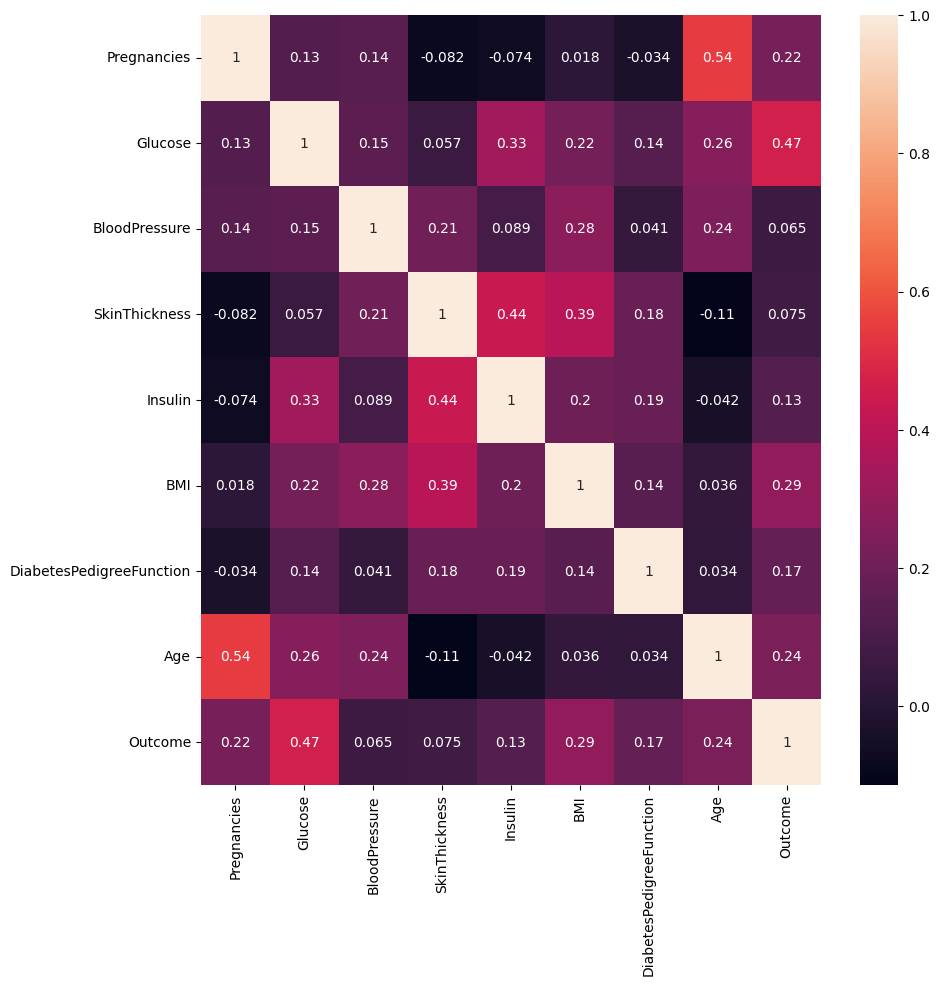

In [ ]:
## values are given if annot=true
plt.figure(figsize=(10,10))
ax=sns.heatmap(dataframe.corr(),annot=True)
plt.savefig("correlation-heatmap.jpg")
plt.show()


**Descriptive statistics of given data**

In [ ]:
dataframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Data Imputation**

here we can impute the data by ,mean,median and mode now the thing is to determined based on the distribution whether it is symmetric or non symmetric


when it is symmetric i.e., with no outliers then we can replace it with mean
when it is non symmetric then we should replace it with median
when it is categorial then we should replace with mode

<ipython-input-13-75c7ba2ef4ac>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['Pregnancies'])


<Axes: xlabel='Pregnancies', ylabel='Density'>

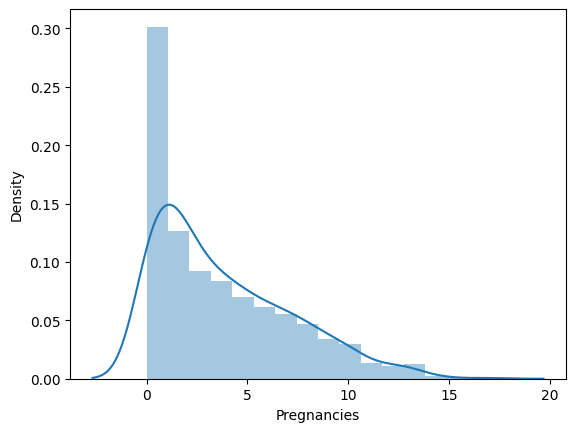

In [ ]:
sns.distplot(dataframe['Pregnancies'])
## replace with median

we have observed zeroes in blood pressures ,  skinthickness ,insulin(possible) ,pregnancies(possible)

<ipython-input-14-b742d0119870>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['BloodPressure'])


<Axes: xlabel='BloodPressure', ylabel='Density'>

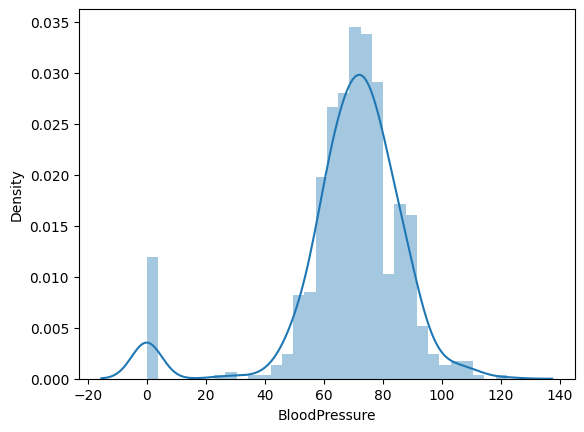

In [ ]:
sns.distplot(dataframe['BloodPressure'])
## replace with mean

<ipython-input-15-0fd3b125e93e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['SkinThickness'])


<Axes: xlabel='SkinThickness', ylabel='Density'>

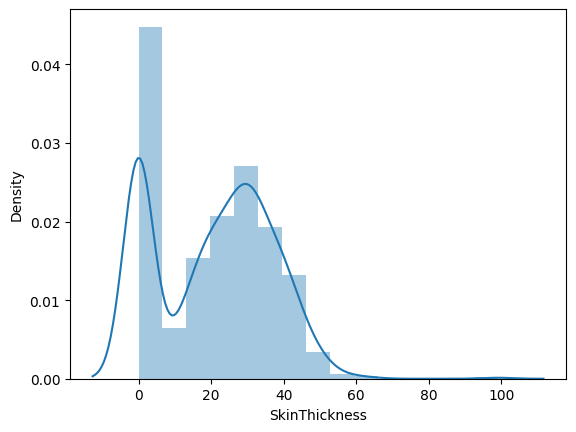

In [ ]:
sns.distplot(dataframe['SkinThickness'])
## replace with median

<ipython-input-16-ce327ea0f5eb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['Insulin'])


<Axes: xlabel='Insulin', ylabel='Density'>

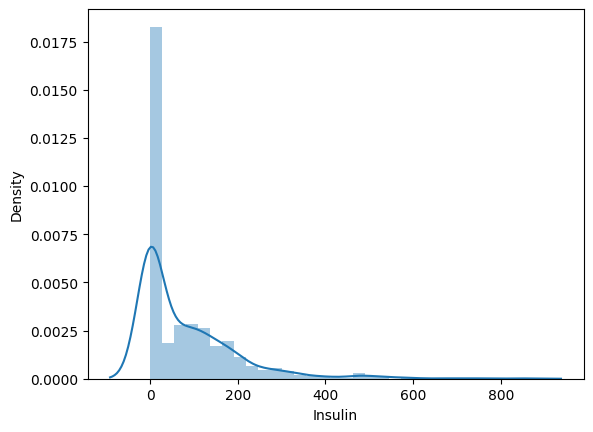

In [ ]:
sns.distplot(dataframe['Insulin'])
## replace with median

In [ ]:
dataframe['Pregnancies']=dataframe['Pregnancies'].replace(0,dataframe['Pregnancies'].median())
dataframe['BloodPressure']=dataframe['BloodPressure'].replace(0,dataframe['BloodPressure'].mean())
dataframe['SkinThickness']=dataframe['SkinThickness'].replace(0,dataframe['SkinThickness'].median())
dataframe['Insulin']=dataframe['Insulin'].replace(0,dataframe['Insulin'].median())


In [ ]:
dataframe.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.000000,35,30.5,33.6,0.627,50,1
1,1,85,66.000000,29,30.5,26.6,0.351,31,0
2,8,183,64.000000,23,30.5,23.3,0.672,32,1
3,1,89,66.000000,23,94.0,28.1,0.167,21,0
4,3,137,40.000000,35,168.0,43.1,2.288,33,1
5,5,116,74.000000,23,30.5,25.6,0.201,30,0
6,3,78,50.000000,32,88.0,31.0,0.248,26,1
7,10,115,69.105469,23,30.5,35.3,0.134,29,0
8,2,197,70.000000,45,543.0,30.5,0.158,53,1
9,8,125,96.000000,23,30.5,0.0,0.232,54,1


<ipython-input-19-be06e6621d92>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['Pregnancies'])
<ipython-input-19-be06e6621d92>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['BloodPressure'])
<ipython-input-19-be06e6621d92>:3: UserWarning: 

`distplot` is a deprecated fun

<Axes: xlabel='Insulin', ylabel='Density'>

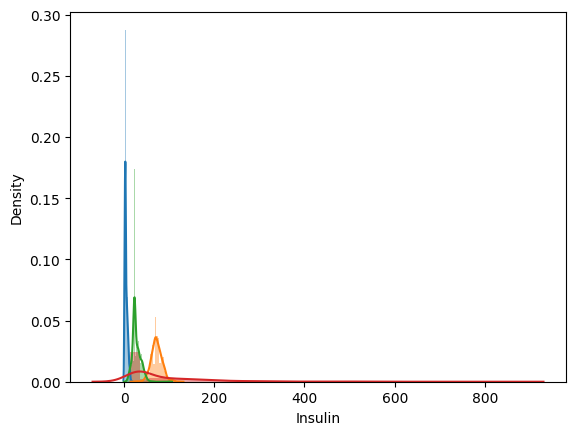

In [ ]:
sns.distplot(dataframe['Pregnancies'])
sns.distplot(dataframe['BloodPressure'])
sns.distplot(dataframe['SkinThickness'])
sns.distplot(dataframe['Insulin'])


<ipython-input-20-7e5747779957>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['Pregnancies'])


<Axes: xlabel='Pregnancies', ylabel='Density'>

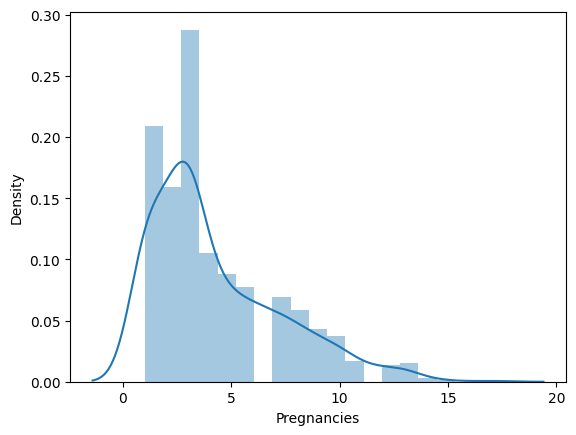

In [ ]:
sns.distplot(dataframe['Pregnancies'])



<ipython-input-21-c2941e0297ca>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['BloodPressure'])


<Axes: xlabel='BloodPressure', ylabel='Density'>

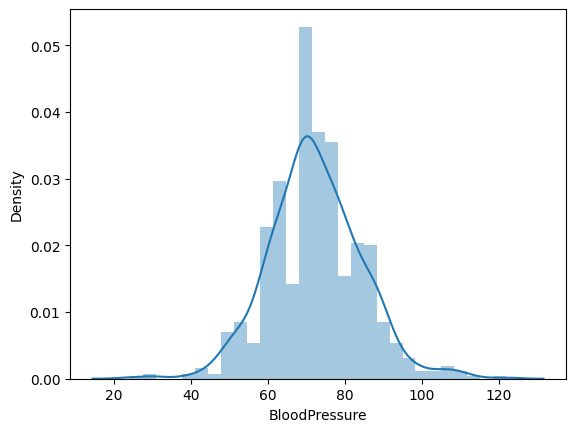

In [ ]:
sns.distplot(dataframe['BloodPressure'])


<ipython-input-22-502b279ac25a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['SkinThickness'])


<Axes: xlabel='SkinThickness', ylabel='Density'>

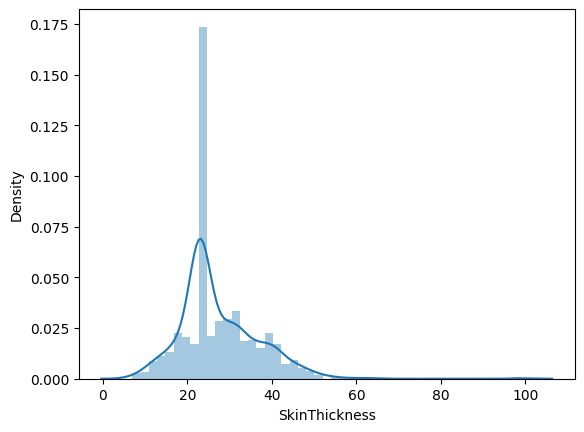

In [ ]:
sns.distplot(dataframe['SkinThickness'])


<ipython-input-23-17afe7c06d49>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['Insulin'])


<Axes: xlabel='Insulin', ylabel='Density'>

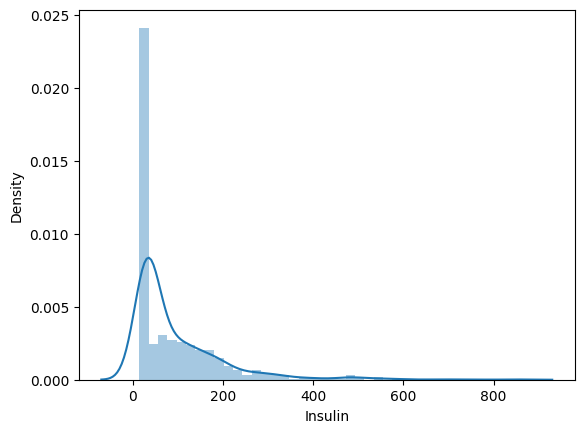

In [ ]:
sns.distplot(dataframe['Insulin'])


<ipython-input-24-98e174ec345e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['Glucose'])


<Axes: xlabel='Glucose', ylabel='Density'>

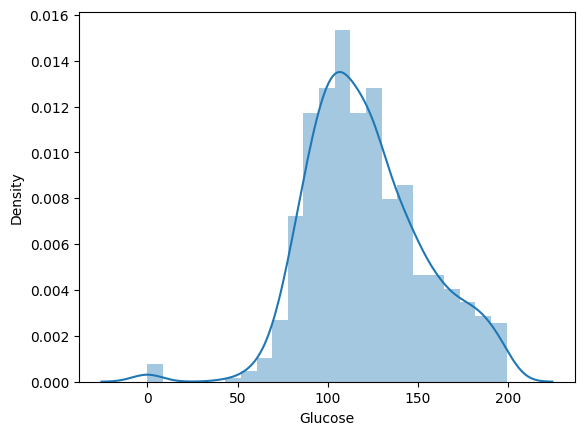

In [ ]:
sns.distplot(dataframe['Glucose'])

In [ ]:
dataframe['Glucose']=dataframe['Glucose'].replace(0,dataframe['Glucose'].mean())


<ipython-input-26-98e174ec345e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['Glucose'])


<Axes: xlabel='Glucose', ylabel='Density'>

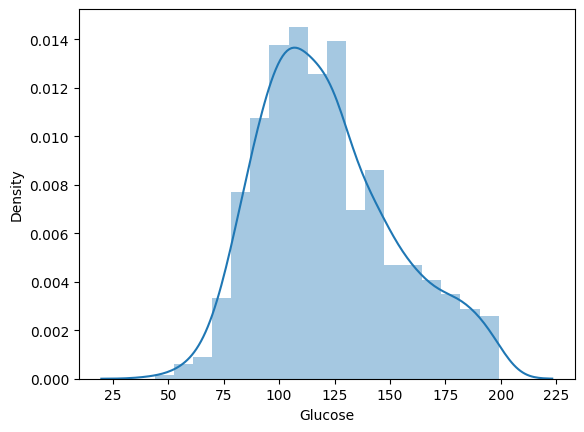

In [ ]:
sns.distplot(dataframe['Glucose'])

<ipython-input-27-6fff0c75e567>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['BMI'])


<Axes: xlabel='BMI', ylabel='Density'>

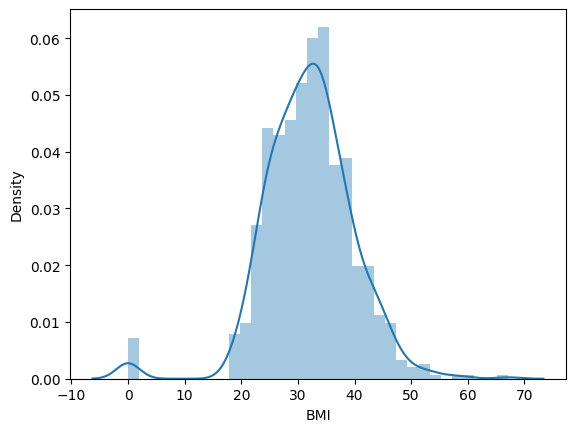

In [ ]:
sns.distplot(dataframe['BMI'])

In [ ]:
dataframe['BMI']=dataframe['BMI'].replace(0,dataframe['BMI'].mean())


<ipython-input-29-6fff0c75e567>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['BMI'])


<Axes: xlabel='BMI', ylabel='Density'>

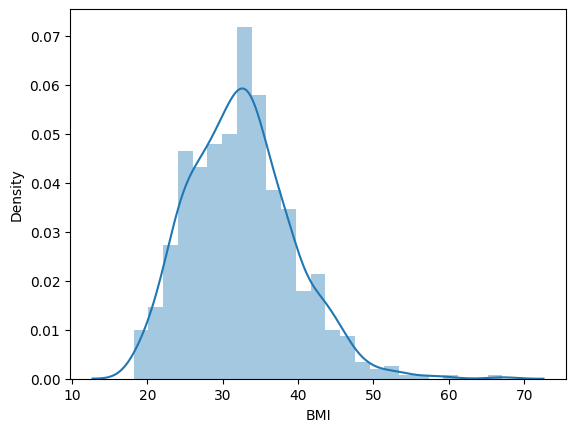

In [ ]:
sns.distplot(dataframe['BMI'])

In [ ]:
dataframe.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35,30.5,33.600000,0.627,50,1
1,1,85.0,66.000000,29,30.5,26.600000,0.351,31,0
2,8,183.0,64.000000,23,30.5,23.300000,0.672,32,1
3,1,89.0,66.000000,23,94.0,28.100000,0.167,21,0
4,3,137.0,40.000000,35,168.0,43.100000,2.288,33,1
5,5,116.0,74.000000,23,30.5,25.600000,0.201,30,0
6,3,78.0,50.000000,32,88.0,31.000000,0.248,26,1
7,10,115.0,69.105469,23,30.5,35.300000,0.134,29,0
8,2,197.0,70.000000,45,543.0,30.500000,0.158,53,1
9,8,125.0,96.000000,23,30.5,31.992578,0.232,54,1


**EDA-Oultiers Detection**

In [ ]:
x=dataframe.drop(columns='Outcome',axis=1)
y=dataframe['Outcome']

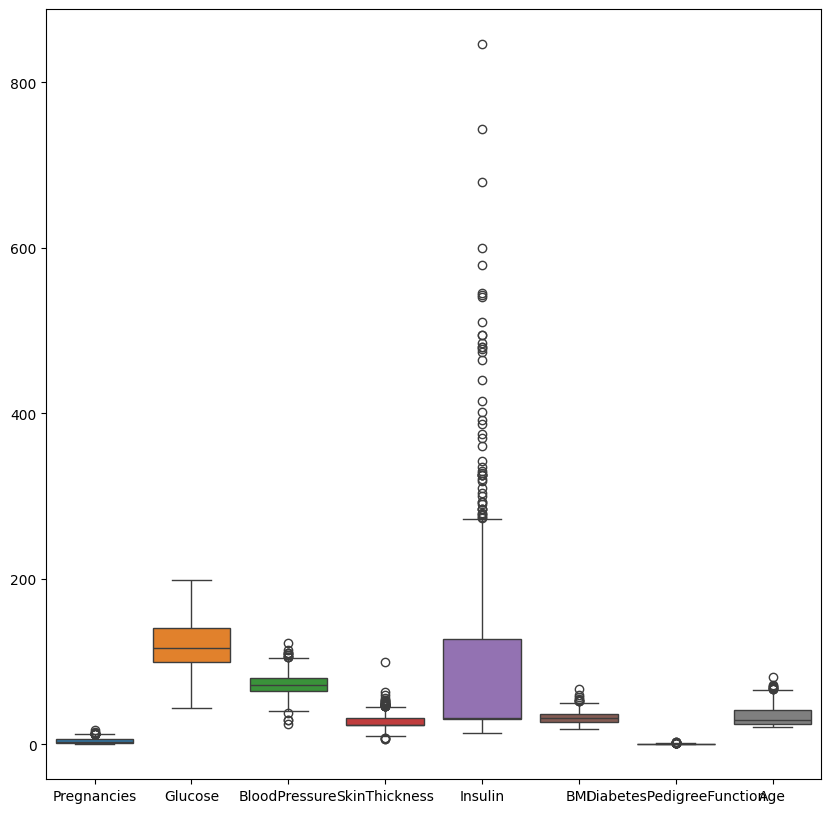

In [ ]:
fig,ax=plt.subplots(figsize=(10,10))
sns.boxplot(data=x,ax=ax)
plt.savefig('boxplot.jpg')

In [ ]:
x.shape

(759, 8)

In [ ]:
cols=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
for col in cols:
  Q1=x[col].quantile(0.25)
  Q3=x[col].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  mask=(x[col]>=lower_bound )& (x[col]<=upper_bound)
x_filtered=x[mask]
y_filtered=y[mask]


In [ ]:
x_filtered=x[mask]
y_filtered=y[mask]

In [ ]:
x_filtered.shape

(752, 8)

In [ ]:
y_filtered.shape

(752,)

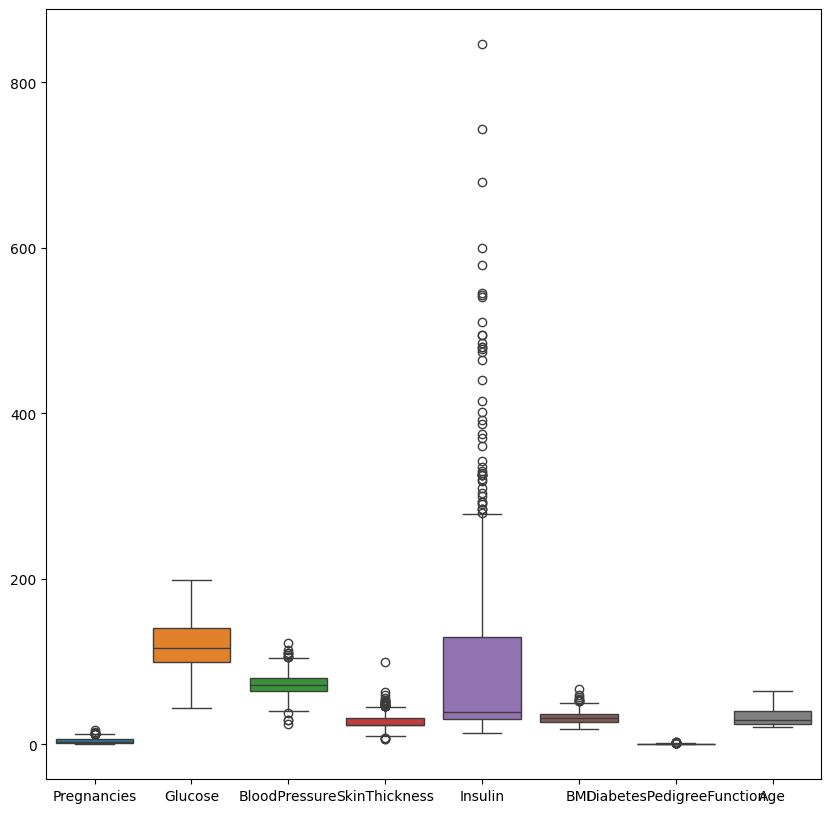

In [ ]:
fig,ax=plt.subplots(figsize=(10,10))
sns.boxplot(data=x_filtered,ax=ax)
plt.savefig('boxplot.jpg')

**Standardizing the data**

will be converting into standard normal form where mean-->0 and standard deviation--> 1

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x_filtered)

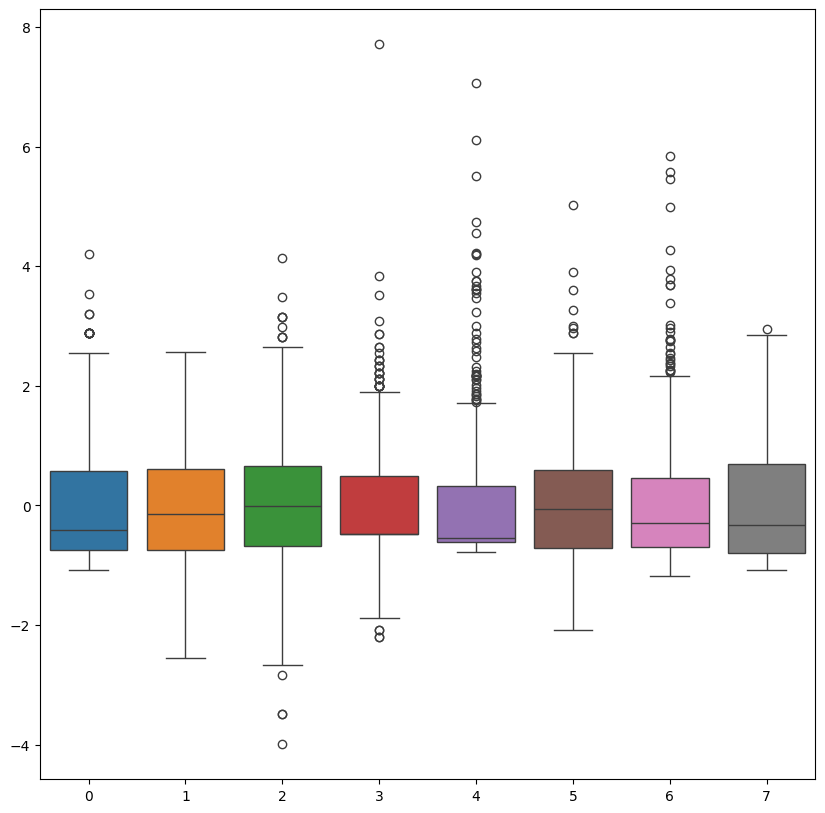

In [ ]:
fig,ax=plt.subplots(figsize=(10,10))
sns.boxplot(data=x_scaled,ax=ax)
plt.savefig('boxplot_scaled.jpg')

In [ ]:
x_scaled=pd.DataFrame(x_scaled,columns=x_filtered.columns)
x_scaled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.520000e+02,7.520000e+02,7.520000e+02,7.520000e+02,7.520000e+02,7.520000e+02,7.520000e+02,7.520000e+02
mean,8.503836e-17,2.267690e-16,3.236182e-16,4.724353e-17,2.952721e-17,-1.228332e-16,1.086601e-16,-1.535415e-17
std,1.000666e+00,1.000666e+00,1.000666e+00,1.000666e+00,1.000666e+00,1.000666e+00,1.000666e+00,1.000666e+00
min,-1.074741e+00,-2.557545e+00,-3.991913e+00,-2.196622e+00,-7.719686e-01,-2.080129e+00,-1.183974e+00,-1.075194e+00
25%,-7.452646e-01,-7.390955e-01,-6.727290e-01,-4.739160e-01,-6.165919e-01,-7.136895e-01,-6.901497e-01,-7.947086e-01
50%,-4.157884e-01,-1.439667e-01,-8.892272e-03,-4.739160e-01,-5.365493e-01,-6.681142e-02,-2.998936e-01,-3.272330e-01
75%,5.726401e-01,6.164757e-01,6.549445e-01,4.951063e-01,3.203768e-01,5.946032e-01,4.618563e-01,7.012135e-01
max,4.196878e+00,2.567176e+00,4.140087e+00,7.708939e+00,7.062785e+00,5.028262e+00,5.846640e+00,2.945097e+00


In [ ]:
y_filtered.shape

(752,)

In [ ]:
y_filtered.value_counts()

,count
Outcome,
0,488
1,264


**Outliers Handling Techniques**

Removing Outliers-using Quantiles

In [ ]:
x_scaled.shape

(752, 8)

In [ ]:
x_scaled.reset_index(drop=True,inplace=True)
y_filtered.reset_index(drop=True,inplace=True)

In [ ]:
q=x_scaled['Insulin'].quantile(0.95)
mask=x_scaled['Insulin']<q
datanew=x_scaled[mask]
y_filtered=y_filtered[mask]

In [ ]:
datanew.shape

(714, 8)

In [ ]:
y_filtered.shape

(714,)

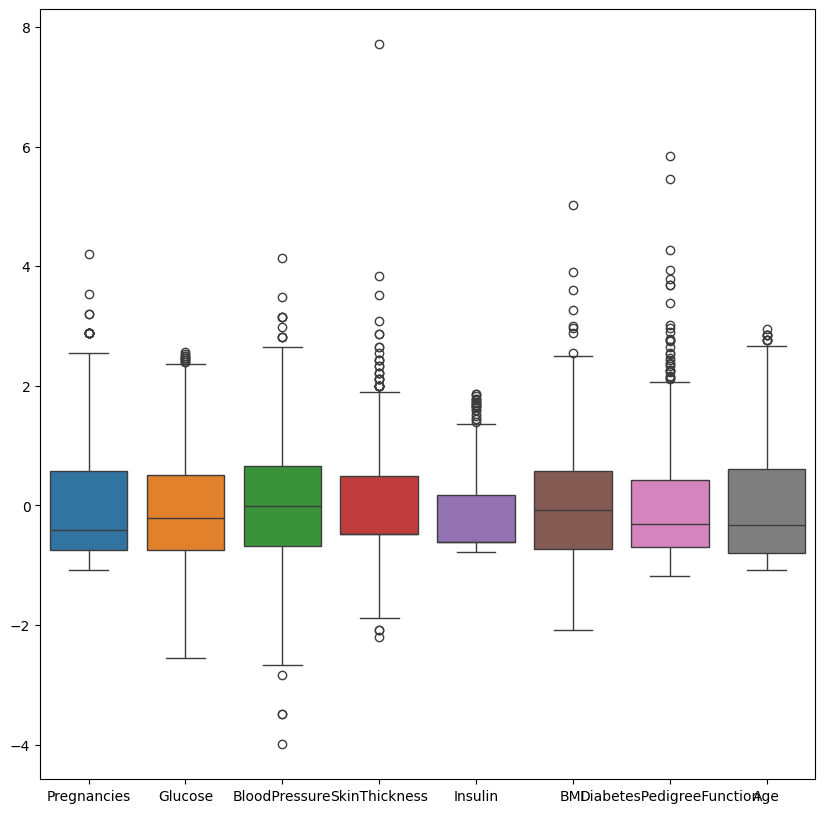

In [ ]:
fig,ax=plt.subplots(figsize=(10,10))
sns.boxplot(data=datanew,ax=ax)
plt.savefig('boxplot_scaled_quantile.jpg')

**Training the model**

Splitting of data and handling imbalanced data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(datanew,y_filtered,test_size=0.33,random_state=42)

In [ ]:
X_train.shape

(478, 8)

In [ ]:
X_test.shape

(236, 8)

In [ ]:
Y_train.shape

(478,)

In [ ]:
Y_train.value_counts()

,count
Outcome,
0,326
1,152


we could observe the biasness in the outcomes --> Data Imbalancing
There are multipe techniques to handle this situation
*   Oversampling : Minority class is taken to increase the number to Majority class  
*   UnderSampling :Majority class is taken to decrease to number of minority class
*   SMOTE : Synthetic data and to increase the number of samples





**Smote technique**

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_train_resampled,Y_train_resampled=smote.fit_resample(X_train,Y_train)
print('\n Resampled class distribution')
print(Y_train_resampled.value_counts())
print(X_train_resampled.value_counts())


 Resampled class distribution
Outcome
0    326
1    326
Name: count, dtype: int64
Pregnancies  Glucose    BloodPressure  SkinThickness  Insulin    BMI        DiabetesPedigreeFunction  Age      
-1.074741    -1.466475  -1.336566       0.279768      -0.376464   0.114896   2.337337                 -0.794709    1
 0.243164     0.054410   0.157067       1.356459      -0.178712   0.231189  -0.610597                 -0.420728    1
             -1.433413  -2.000403      -0.473916      -0.616592   0.173042   0.545161                 -0.701214    1
             -1.201974   0.157067      -0.581585      -0.616592  -0.510177   2.256284                 -0.046748    1
             -1.168911  -0.340811       0.064430      -0.235213  -0.335738  -0.325410                 -0.794709    1
                                                                                                                  ..
-0.415788    -0.706033  -0.340811      -0.473916      -0.141045  -0.132226   1.430742                 -

**Model Training: Implementation Of Logisitc Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
classification=LogisticRegression()
classification.fit(X_train_resampled,Y_train_resampled)

LogisticRegression()

**Model Prediction and Evaluation**

In [ ]:
y_predictions=classification.predict(X_test)
print(y_predictions)

[0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0 0
 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0
 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1
 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0
 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0
 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1
 0 1 0 0 0 1 1 1 0 1 0 1 1 1]


To check the accuracy score we have .accuracy_score in sklearn.metric

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_predictions)

0.7415254237288136

In [ ]:
from sklearn.metrics import classification_report
target_names=['Non-Diabetic','Diabetic']
print(classification_report(Y_test,y_predictions,target_names=target_names))

              precision    recall  f1-score   support

Non-Diabetic       0.82      0.75      0.78       146
    Diabetic       0.64      0.73      0.68        90

    accuracy                           0.74       236
   macro avg       0.73      0.74      0.73       236
weighted avg       0.75      0.74      0.74       236



in health care domain **Recall** is very important as it deals with the false negative values  

**Save the model**

In [ ]:
import pickle
pickle.dump(classification,open("classification_model.pkl",'wb'))

to use this file in future , download it and give the following commands

In [ ]:
classification_model=pickle.load(open("classification_model.pkl","rb"))

In [ ]:
classification_model.predict(X_test)

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1])